## Review
### This recitation (10.04) covers two following lectures below:
- **09.20 (Wed)**
- **09:25 (Mon)**

In [ ]:
import numpy as np
from builtins import range
import matplotlib.pyplot as plt

### Gradient descent
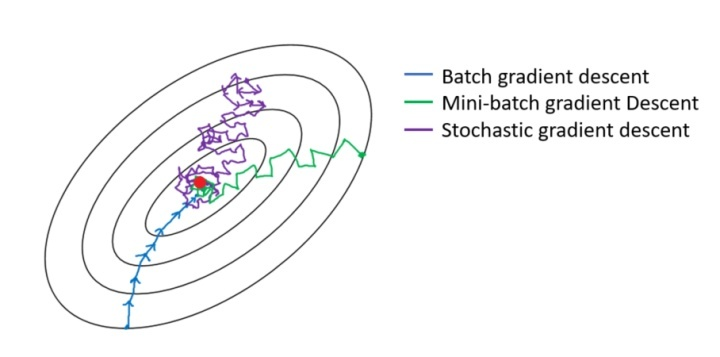

#### Batch Gradient Descent (BGD)


*   We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters.
*   Batch Gradient Descent is great for convex or relatively smooth error manifolds.
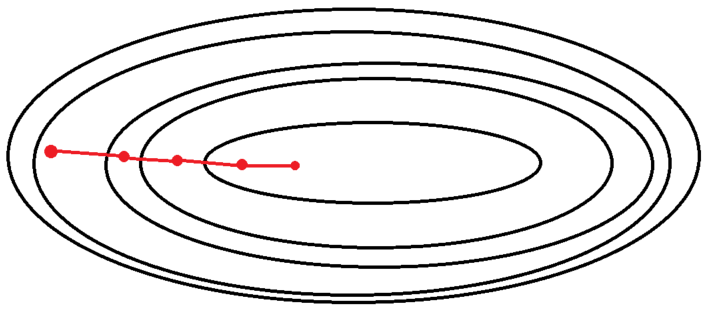


In [ ]:
# input data
np.random.seed(1)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

y = 0.3*x1 + 0.5*x2 + 0.6*x3 + 0.8

# initialize the weights
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)
bias = np.random.uniform(low=-1.0, high=1.0)

In [ ]:
num_epoch = 5000
learning_rate = 0.5

for epoch in range(num_epoch):
  # Prediction
  predict = w1*x1 + w2*x2 + w3*x3 + bias
  error = ((predict - y)**2).mean()

  # Weights update
  w1 = w1 - 2*learning_rate*((predict - y)*x1).mean()
  w2 = w2 - 2*learning_rate*((predict - y)*x2).mean()
  w3 = w3 - 2*learning_rate*((predict - y)*x3).mean()
  bias = bias - 2*learning_rate * (predict - y).mean()

  if epoch%10 == 0:
    print("epoch", epoch, "w1=", w1 , "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)

  if error < 1e-4:
    break

print("Final: ","w1=", w1 , "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)
print(f"BGD: Y={w1}X1+{w2}X2+{w3}X3+{bias}")

#### Stochastic Gradient Descent (SGD)


*   We consider just one example at a time to take a single step.
*   We do the following steps in one epoch for SGD:


1.   Take an example
2.   Feed it to Network
3.   Calculate it’s gradient
4.   Use the gradient we calculated in step 3 to update the weights
5.   Repeat steps 1–4 for all the examples in training dataset

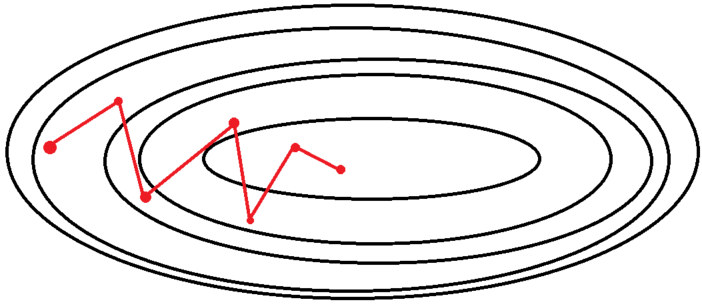


In [ ]:
# input data
np.random.seed(1)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

y = 0.3*x1 + 0.5*x2 + 0.6*x3 + 0.8

# initialize the weights
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)
bias = np.random.uniform(low=-1.0, high=1.0)

In [ ]:
num_epoch = 5000
learning_rate = 0.5


for epoch in range(num_epoch):

  # Pick one data
  # YOUR CODE HERE
  x1_sgd = np.random.choice(x1)
  x2_sgd = np.random.choice(x2)
  x3_sgd = np.random.choice(x3)
  y_sgd = 0.3*x1_sgd + 0.5*x2_sgd + 0.6*x3_sgd + 0.8

  # Prediction
  predict_sgd = w1*x1_sgd + w2*x2_sgd + w3*x3_sgd + bias

  # Weights update
  w1 = w1 - 2*learning_rate*((predict_sgd - y_sgd)*x1_sgd)
  w2 = w2 - 2*learning_rate*((predict_sgd - y_sgd)*x2_sgd)
  w3 = w3 - 2*learning_rate*((predict_sgd - y_sgd)*x3_sgd)
  bias = bias - 2*learning_rate * (predict_sgd - y_sgd)

  # Error in whole dataset
  predict = w1*x1 + w2*x2 + w3 + bias
  error = ((y - predict)**2).mean()

  if epoch%1000 == 0:
    print("epoch", epoch, "w1=", w1 , "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)

  if error < 1e-4:
    break

print("Final: ","w1=", w1 , "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)
print(f"BGD: Y={w1}X1+{w2}X2+{w3}X3+{bias}")

#### Mini-Batch Gradient Descent


*   We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch.
*   Doing this helps us achieve the advantages of both the former variants we saw.
*   After creating the mini-batches of fixed size, we do the following steps in one epoch:


1.   Pick a mini-batch
2.   Feed it to Network
3.   Calculate the mean gradient of the mini-batch
4.   Use the mean gradient we calculated in step 3 to update the weights
5.   Repeat steps 1–4 for the mini-batches we created

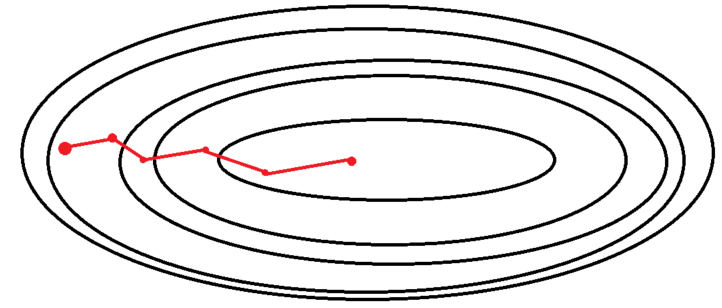


In [ ]:
# input data
np.random.seed(1)
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

y = 0.3*x1 + 0.5*x2 + 0.6*x3 + 0.8

# initialize the weights
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)
bias = np.random.uniform(low=-1.0, high=1.0)

In [ ]:
num_epoch=10
learning_rate=0.5


for epoch in range(num_epoch):
  print("epoch: ", epoch)
  print("-"*50)
  batch_size = 10
  batch_number = 100/10
  start = 0
  end = 10
  for iteration in range(int(batch_number)):

    # Pick a mini-batch
    #YOUR CODE HERE
    x1_batch = x1[start:end]
    x2_batch = x2[start:end]
    x3_batch = x3[start:end]
    y_batch = 0.3*x1_batch + 0.5*x2_batch + 0.6*x3_batch + 0.8

    start += 10
    end += 10

    # Prediction
    predict_batch = w1*x1_batch + w2*x2_batch + w3*x3_batch + bias

    # Weights update
    w1 = w1 - 2*learning_rate*((predict_batch - y_batch)*x1_batch).mean()
    w2 = w2 - 2*learning_rate*((predict_batch - y_batch)*x2_batch).mean()
    w3 = w3 - 2*learning_rate*((predict_batch - y_batch)*x3_batch).mean()
    bias = bias - 2*learning_rate * (predict_batch - y_batch).mean()

    # Error in whole dataset
    predict = w1*x1 + w2*x2 + w3*x3 + bias
    error = ((y - predict)**2).mean()

    print("iteration ", iteration,"w1=", w1, "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)

  if error < 1e-4:
    break

print("Final: ","w1=", w1 , "w2=", w2, "w3=", w3,"bias=", bias, "error=", error)
print(f"BGD: Y={w1}X1+{w2}X2+{w3}X3+{bias}")

### Backpropagation

#### Copy gate

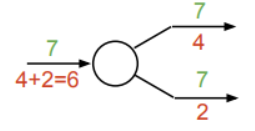

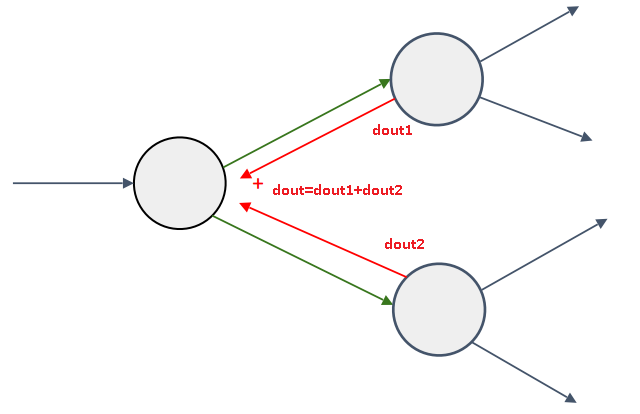

In [ ]:
class CopyLayer:
  def __init__(self):
    # YOUR CODE HERE
    self.x = None

  def forward(self, x):
    # YOUR CODE HERE
    self.x = x
    out_1 = x
    out_2 = x
    return out_1, out_2

  def backward(self, dout_1, dout_2):
    # YOUR CODE HERE
    dx = dout_1 + dout_2
    return dx

#### Max gate

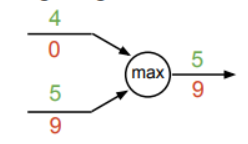

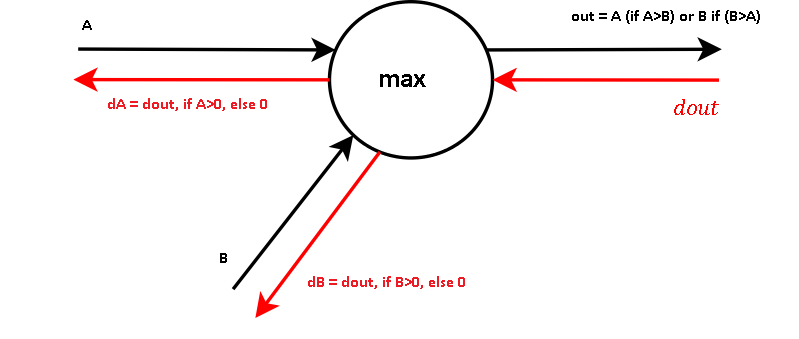

In [ ]:
class MaxLayer:
  def __init__(self):
    # YOUR CODE HERE
    self.x = None
    self.y = None

  def forward(self, x, y):
    # YOUR CODE HERE
    self.x = x
    self.y = y
    if self.x >= self.y:
      out = self.x
    else:
      out = self.y
    return out

  def backward(self, dout):
    # YOUR CODE HERE
    if self.x > 0:
      dx = dout
    else:
      dx = 0
    if self.y > 0:
      dy = dout
    else:
      dy = 0
    return dx, dy

#### Multi-layer net
Implement of multi-layer more than three.

We will implement a model that allows users to determine the number of layers.



```
model = MultiLayerNet(layers=[1,5,5,5,1])
```



In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
  # Details about sigmoid gradient are in lecture 4-2
  return (1.0 - sigmoid(x)) * sigmoid(x)

def identity(x):
  return x

class MultiLayerNet:
  """
  Args:
        layers : [x_dim, node, ... , node, out_dim]
  """
  def __init__(self, layers):
    self.layers = layers
    self.activate = [identity]
    self.weights = [1]
    self.bias = [0]
    self.lr = 0.001

    for i in range(1, len(self.layers)):
      self.weights.append(np.random.normal(0, 0.5, (self.layers[i - 1], self.layers[i])))
      self.bias.append(np.random.normal(0, 0.5, self.layers[i]))

      if i != len(self.layers) - 1:
        self.activate.append(sigmoid)
      else:
        self.activate.append(identity)

  def forward(self, x):
    # U: before activation function
    # Z: after activation function
    self.U = [x]
    self.Z = [x]

    for i in range(1, len(self.layers)):
      # YOUR CODE HERE
      u = self.Z[i - 1].dot(self.weights[i]) + self.bias[i]
      z = self.activate[i](u)
      self.U.append(u)
      self.Z.append(z)

    return self.Z[-1]


  def backward(self, x, y):
    pred_y = self.forward(x)
    self.D = []

    for i in reversed(range(1,len(self.layers))):
      if i == len(self.layers) - 1:
        d = pred_y - y
      else:
        d = sigmoid_grad(self.U[i])*(self.D[-1].dot(self.weights[i + 1].T))

      dW = self.Z[i - 1].T.dot(d)
      db = np.sum(d, axis=0)

      self.weights[i] -= self.lr*dW
      self.bias[i] -= self.lr*db
      self.D.append(d)

  def evaluate(self, x, y):
    pred_y = self.forward(x)
    d = pred_y - y
    return np.mean(np.sqrt(d**2))

In [ ]:
model = MultiLayerNet(layers=[1, 5, 5, 5, 1])

train_x = np.linspace(-5, 5, 100)
train_y = np.sin(train_x)

x = train_x.reshape(-1, 1)
y = train_y.reshape(-1, 1)

pred_y = model.forward(x)

for i in range(50000):
  model.backward(x, y)

  if (i+1) % 5000 == 0:
    error = model.evaluate(x, y)
    print('Epoch={:05d}, Loss={:.4f}'.format(i + 1, error))

pred_y = model.forward(x)

plt.plot(x.ravel(), pred_y.ravel(), label='prediction')
plt.plot(x.ravel(), train_y.ravel(), label='original')
plt.legend()